# TRIVA: Introduction
### Libraries
Let's first import the libraries we will need:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

### Downloading and visualizing images
`!wget` lets you download files into the local directory:

In [6]:
import urllib.request

url = "https://ecoledesponts.fr/sites/default/files/styles/actualite_full/public/pages/images/Charte-graphique-enpc.jpg?itok=4nsLYxDh"

urllib.request.urlretrieve(url, "logo.png")


('logo.png', <http.client.HTTPMessage at 0x22106bce2f0>)

We can now download the image into a `numpy` array using:

In [7]:
im = np.array(imageio.imread('logo.png'))

C:\Users\edwar\AppData\Local\Temp\ipykernel_6632\2645033285.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = np.array(imageio.imread('logo.png'))


We can visualize the image using:

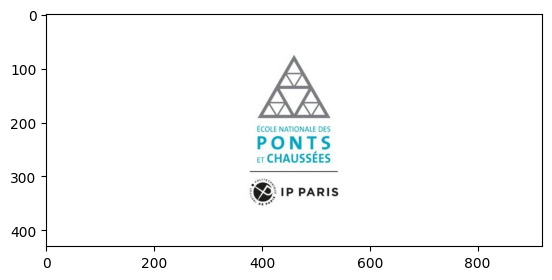

In [8]:
plt.imshow(im)

Using Python, can you tell the resolution of logo.png?

In [9]:
print(im.shape)
# ..

(430, 920, 3)


Using Python, can you tell the color of the characters for 'ECOLE NATIONALE DES PONTS ET CHAUSSEES'?

Estimated RGB color of text:
[ 98 187 199]


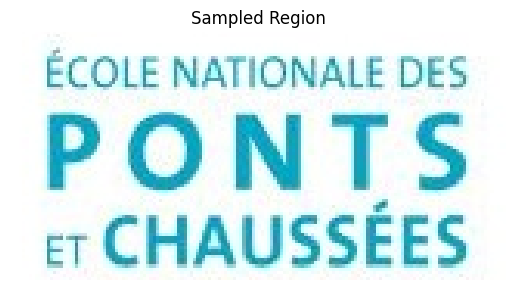

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image (OpenCV loads BGR)
im = cv2.imread("logo.png")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# ---- 1. Define region around turquoise text ----
# Text is roughly centered around x ≈ 400–520, y ≈ 200–280
region = im[200:280, 380:540]

# ---- 2. Remove white background ----
# Convert to grayscale
gray = cv2.cvtColor(region, cv2.COLOR_RGB2GRAY)

# Create mask: keep non-white pixels
mask = gray < 240   # threshold for white

# Extract only colored pixels
colored_pixels = region[mask]

# ---- 3. Compute dominant color (mean of text pixels) ----
mean_color = np.mean(colored_pixels, axis=0)

print("Estimated RGB color of text:")
print(mean_color.astype(int))

# ---- 4. Show selected region ----
plt.imshow(region)
plt.title("Sampled Region")
plt.axis("off")
plt.show()


### Let's try something interactive
Run the code below that uses your webcam and open a window with the video stream.  **This does not work with COLAB**, you need to use jupyter.

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")

show_modified = False
while True:
    ret, captured = cap.read()
    
    modified = cv2.GaussianBlur(captured, (15, 15), 0)
    
    if show_modified:
        text = "modified"
        displayed = modified
    else:
        text = "captured"
        displayed = captured
    displayed = cv2.putText(displayed, text, (40, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    cv2.imshow('triva', displayed)
        
    c = cv2.waitKey(1)
    if c == 27 or c == ord('q'):  # Use Esc key or 'q' to exit
        break
    elif c == ord(' '):
        show_modified = not show_modified

cap.release()
cv2.destroyAllWindows()

Test the following OpenCV functions and the influence of their parameters:
- `GaussianBlur`
- `bilateralFilter`
- `Sobel`
- `Canny`
- `cvtColor` with `cv::COLOR_RGB2GRAY`
- and more if you want.

### More fun
Can you make your image look like https://vincentlepetit.github.io/files/lectures/triva/triva_intro.png? (hint: you may need to use `np.uint8`).

Can you make your image look like https://vincentlepetit.github.io/files/lectures/triva/triva_intro2.png? (hint: quantization).